# <center>Introduction to Altair</center>

### Content
This data set consists of the marks secured by the students in various subjects in the United States.

### Objective
Explore the new Data visualization tool called *Altair*.

In [1]:
import altair as alt
from altair import datum
import numpy as np
import pandas as pd

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
performance = pd.read_csv('StudentsPerformance.csv')

### Data Description

In [3]:
performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
performance.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [5]:
performance.shape

(1000, 8)

This dataset contains 1000 rows and it appears that there are no missing data.

### Altair

Altair takes the dataset as a whole using ***chart*** function.

**Markings and Encoding** are the two main components of vistualization.

Here is the simple example of charts which are interactive on selection. It looks like there is a less number of parents who hold a Master's degree.

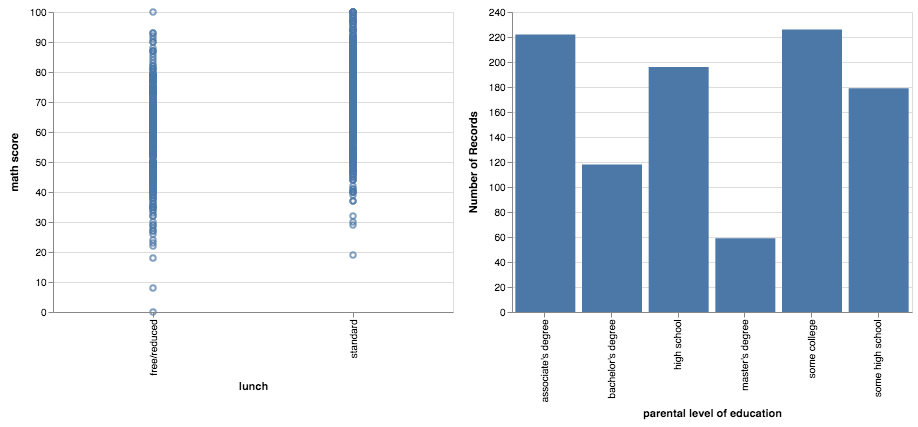

In [6]:
brush = alt.selection(type='interval')
points = alt.Chart().mark_point().encode(
    x='lunch',
    y='math score'
).properties(
    width=400
).add_selection(
    brush
)

bars = alt.Chart().mark_bar().encode(
    x = 'parental level of education',
    y = 'count()'
).transform_filter(
    brush
).properties(
    width=400
)

alt.hconcat(points, bars, data=performance)

### Data Exploration

Let us explore the dataset with some of the charts with the help of altair.

#### How many Students are Male and Female?

Female students are more when compared to Male, however there is no signficant difference between them.

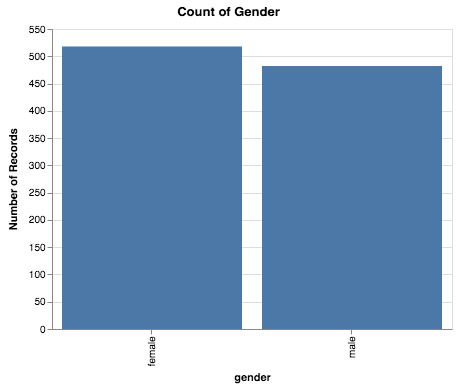

In [7]:
alt.Chart(performance).mark_bar().encode(
    x = 'gender',
    y = 'count()'
).properties(
    width = 400,
    title = "Count of Gender"
)

#### What are the Race/Ethinicty present in the data and their count?

There are 5 types of race where Group C is the most followed by Group D and Group B.

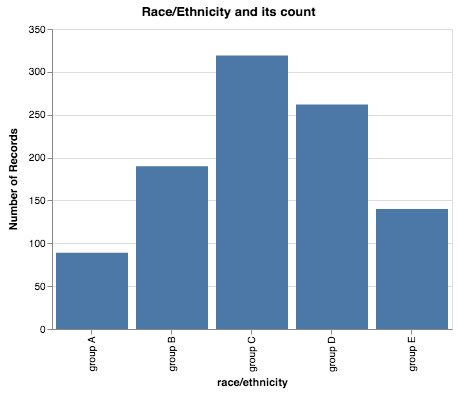

In [8]:
alt.Chart(performance).mark_bar().encode(
    x = 'race/ethnicity',
    y = 'count()'
).properties(
    width = 400,
    title = "Race/Ethnicity and its count"
)

#### Test preparation course

Let us undertand what the test preparation score means and which parents are recommending their kids to take up and course and complete.

Let us aggregate the parental level of education into 3 types.
    1. College degree
    2. Professional degree
    3. High School
    
Select the ***test preparation course*** to see how much the other charts vary.

In [9]:
performance.loc[(performance['parental level of education'] == 'high school') |
                (performance['parental level of education'] == 'some high school'), ['parental level of education']] = 'school'

performance.loc[(performance['parental level of education'] == "associate's degree") |
                (performance['parental level of education'] == "bachelor's degree") | 
                (performance['parental level of education'] == "master's degree"), ['parental level of education']] = 'professional_degree'

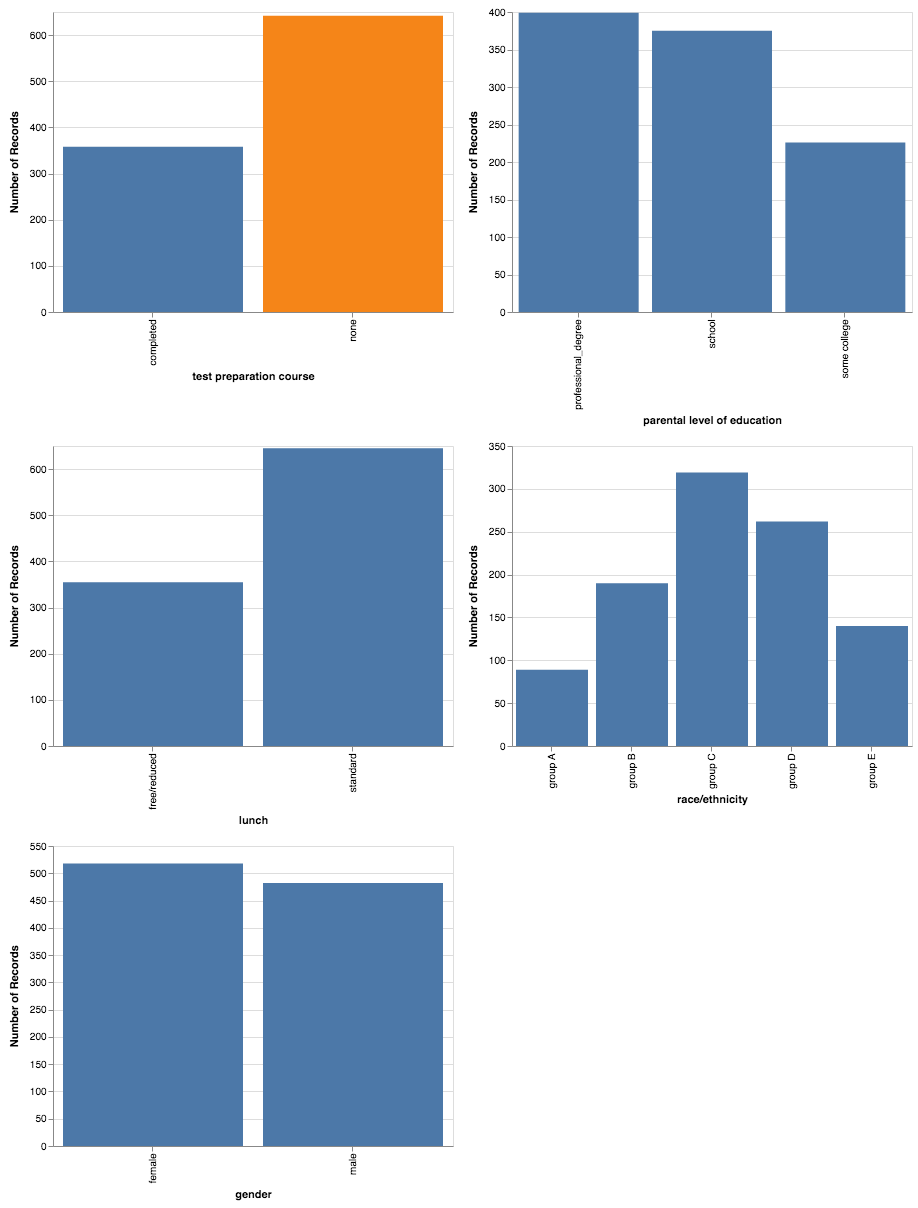

In [10]:
brush = alt.selection_multi(encodings=['x'])
points = alt.Chart().mark_bar().encode(
    x='test preparation course',
    y='count()',
    color = alt.condition(brush,
                      alt.Color('test preparation course:N', legend=None),
                      alt.value('lightgray'))
).properties(
    width=400
).add_selection(
    brush
)

bars = alt.Chart().mark_bar().encode(
    y = 'count()'
).transform_filter(
    brush
).properties(
    width=400
)

#alt.hconcat(points, bars, data=performance)

alt.vconcat(alt.hconcat(points, bars.encode(x = 'parental level of education:N'), data = performance),
alt.hconcat(bars.encode(x = 'lunch:N'), bars.encode(x = 'race/ethnicity:N'), data = performance), bars.encode(x = 'gender:N'), data = performance)

### Want to see how the level of education of the parents based on race

Here are some of the interesting findings.

    1) Group C has the most parents with a professional degree and Group A has the least parents with professional degree.
    2) Group A and B has most parents having high school as their level of education.
    3) Group D  has fairly equal number of parents in terms of levels of education.

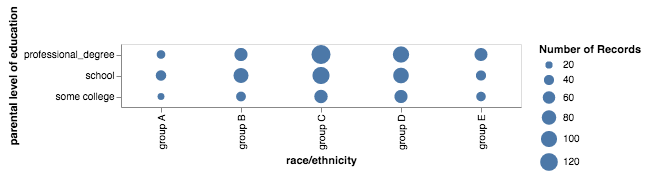

In [11]:
alt.Chart(performance).mark_circle().encode(
    x='race/ethnicity:N',
    y='parental level of education:N',
    size='count():Q',
    tooltip=['count()']
).properties(
    width = 400
)

### Exam scores distribution

There is just one student who has got a Zero in Math.

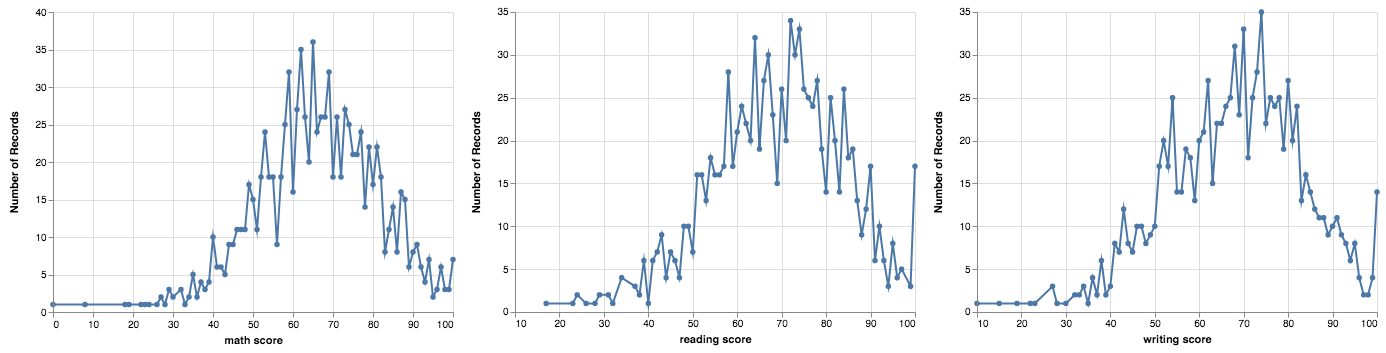

In [12]:
line = alt.Chart(performance).mark_line(point=True).encode(
    y='count()'
)

alt.hconcat(line.encode(x = 'math score'), line.encode(x = 'reading score'), line.encode(x = 'writing score'))

#### Total number of students failed in all the 3 considering 40 is the pass mark.

    1) 18 students failed in all the 3 courses. 
    2) Surprisingly no student who has completed the test preparation course has failed in all the 3 subjects. Does it mean this preparation course makes a difference?
    3) Only 1 student failed whose parents have a professional degree and most students whose parents have only high school failed the most. Can we conclude that the parent's educational degree matters in educating their children?
    4) most of the failed students have reduced or free lunch. Is it because these students are part of athletics and sports where the school is offering reduced food?
    

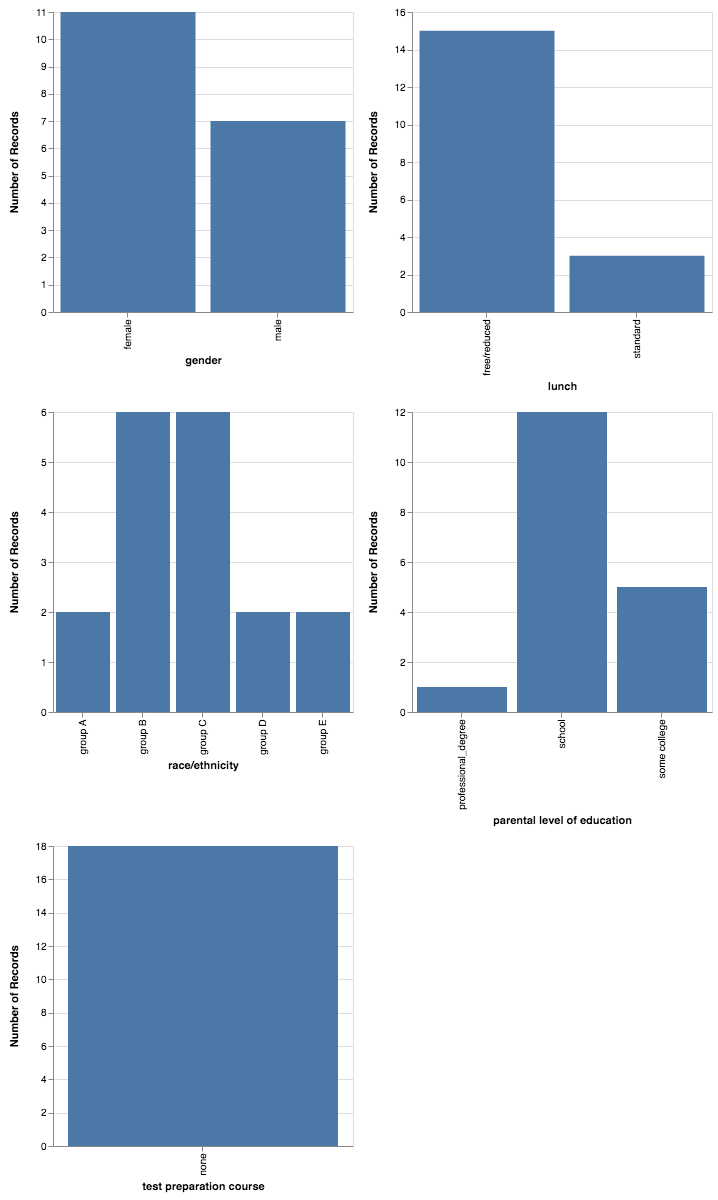

In [13]:
bar = alt.Chart(performance).mark_bar().encode(
    y = 'count()'
).properties(
    width = 300
).transform_filter(
    alt.FieldLTEPredicate(field='math score', lte = 40)
).transform_filter(
    alt.FieldLTEPredicate(field='reading score', lte = 40)
).transform_filter(
    alt.FieldLTEPredicate(field='writing score', lte = 40)
)

(bar.encode(x = 'gender') |  bar.encode(x = 'lunch')) & \
(bar.encode(x = 'race/ethnicity') | bar.encode(x = 'parental level of education')) & \
bar.encode(x = 'test preparation course')

#### To add more confidence to the questions raised in the previous cell, let us consider students who have failed in atleast one of the subjects and look for the distribution.

It is evident that most of the failed students parents have just a high school degree. Also, out of around 350 students who have completed the test preparation course, only 10 students failed. It is clearly seen that the course is helping most of the students.

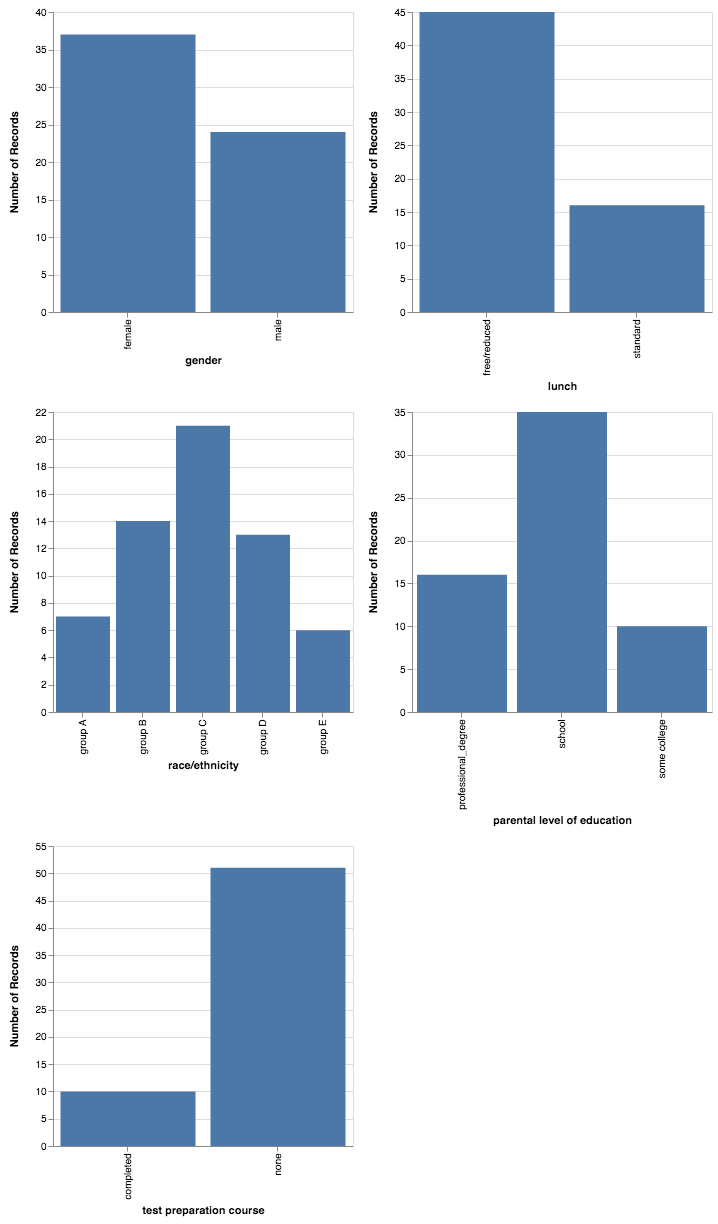

In [14]:
bar = alt.Chart(performance).mark_bar().encode(
    y = 'count()'
).properties(
    width = 300
).transform_filter(
    (datum['math score'] <= 40) |\
    (datum['reading score'] <= 40) |\
    (datum['writing score'] <= 40) & 
    ~((datum['math score'] <= 40) &\
    (datum['reading score'] <= 40) &\
    (datum['writing score'] <= 40))
)

(bar.encode(x = 'gender') |  bar.encode(x = 'lunch')) & \
(bar.encode(x = 'race/ethnicity') | bar.encode(x = 'parental level of education')) & \
bar.encode(x = 'test preparation course')

#### Students secured more than 80% in all the exams

Insights:

    1) Parents have a professional degree.
    2) Test preparation course helps secure very high percent in the exam.

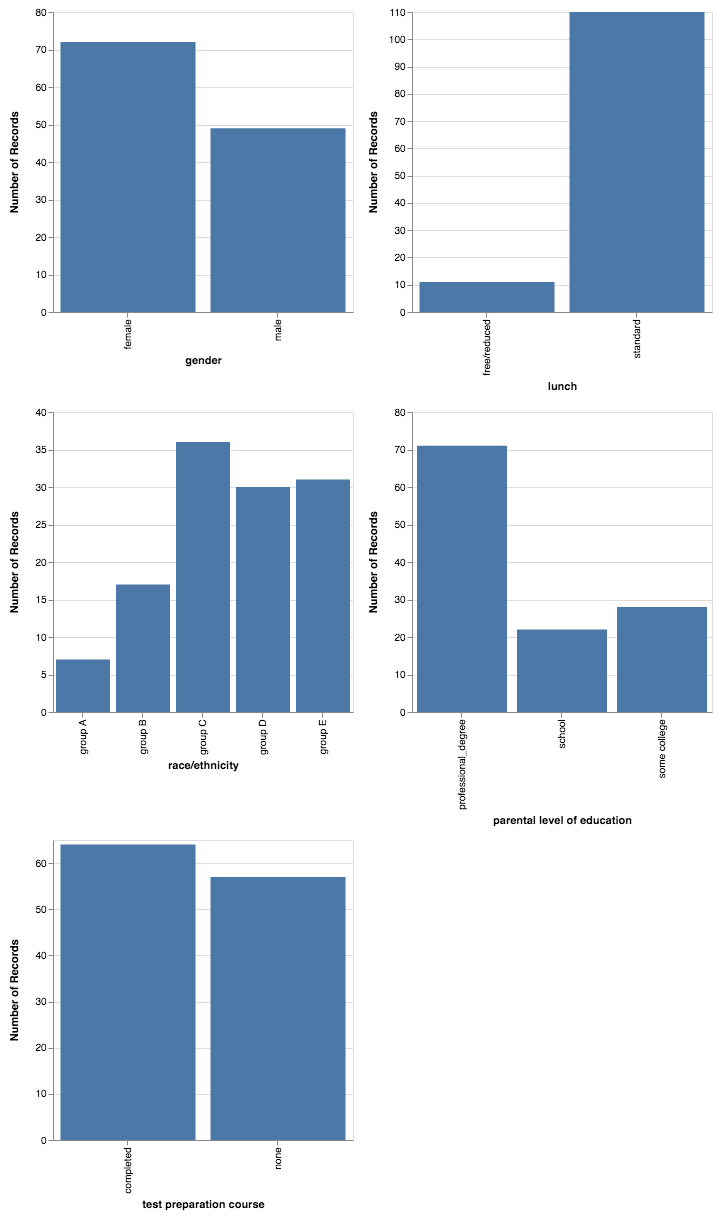

In [15]:
bar = alt.Chart(performance).mark_bar().encode(
    y = 'count()'
).properties(
    width = 300
).transform_filter(
    (datum['math score'] >= 80) &\
    (datum['reading score'] >= 80) &\
    (datum['writing score'] >= 80)
)

(bar.encode(x = 'gender') |  bar.encode(x = 'lunch')) & \
(bar.encode(x = 'race/ethnicity') | bar.encode(x = 'parental level of education')) & \
bar.encode(x = 'test preparation course')

#### Scatterplot of reading, writing and math scores

The students have almost equal scores secured in both reading and writing. Hence a simple linear regression can be used to predict the score of a student given any one of the reading or writng score.

However, predicting the math score is little hard as, the makrs secured are widely spread, but they are still increasing with an increase in one score. 

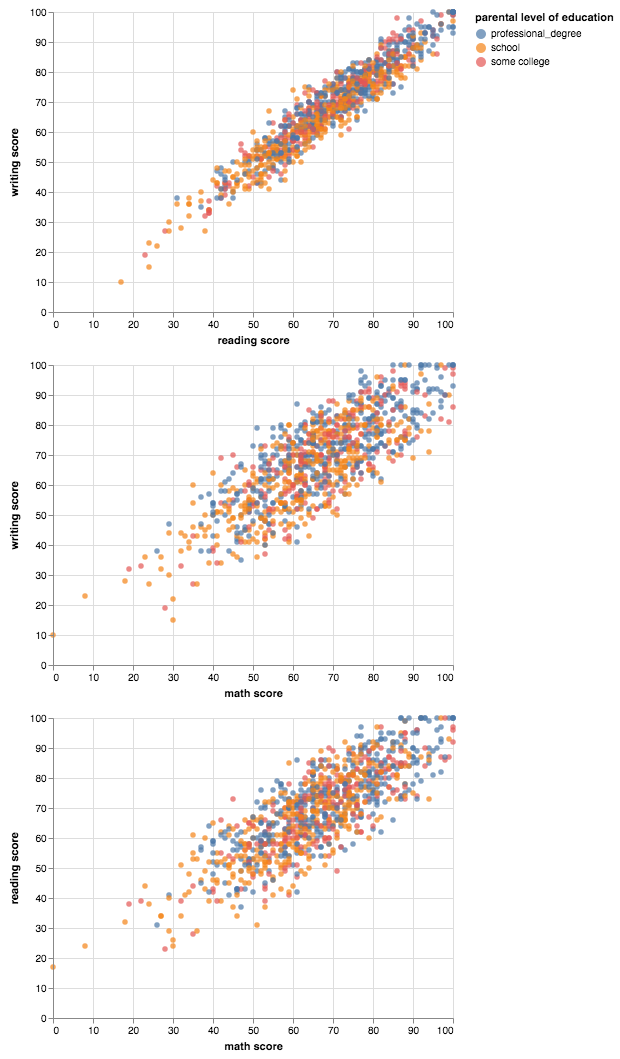

In [16]:
base = alt.Chart(performance)

area_args = {'opacity': .3, 'interpolate': 'step'}
blank_axis = alt.Axis(title='')

points = base.mark_circle().encode(
    color='parental level of education'
)

points.encode(x = 'reading score', y = 'writing score') &\
points.encode(x = 'math score', y = 'writing score') &\
points.encode(x = 'math score', y = 'reading score')